In [1]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

### HS코드를 BEC로 매핑하기

In [3]:
HS_to_BEC = pd.read_excel('HS2012-17-BEC5 -- 08 Nov 2018.xlsx', sheet_name=1)
HS_to_BEC['HS6'] = HS_to_BEC['HS6'].astype(str)
HS_to_BEC['HS6'] = HS_to_BEC['HS6'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))

### 수입액 기준으로 나라별 분류

In [12]:
data_dir = os.listdir()
data_dir = data_dir[12]

In [13]:
data_dir

'주요 교역국 대세계 품목별 수출입액(USD단위)'

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Vi

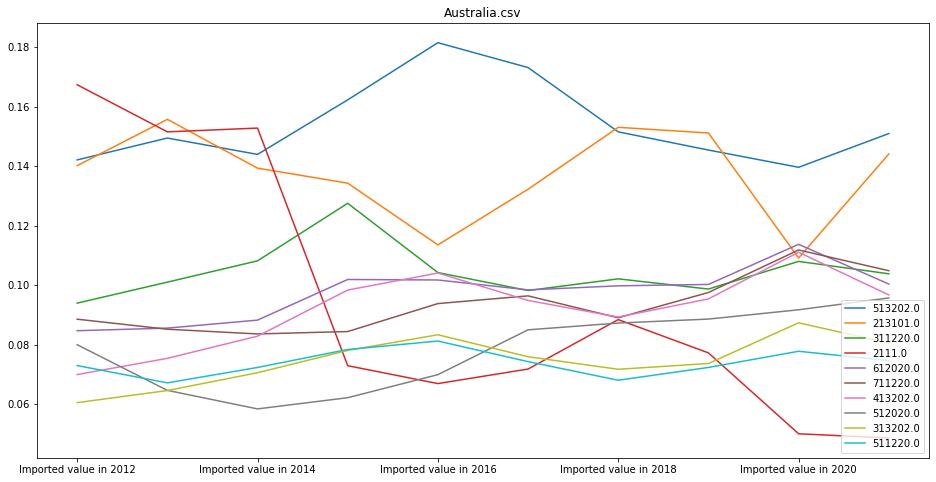

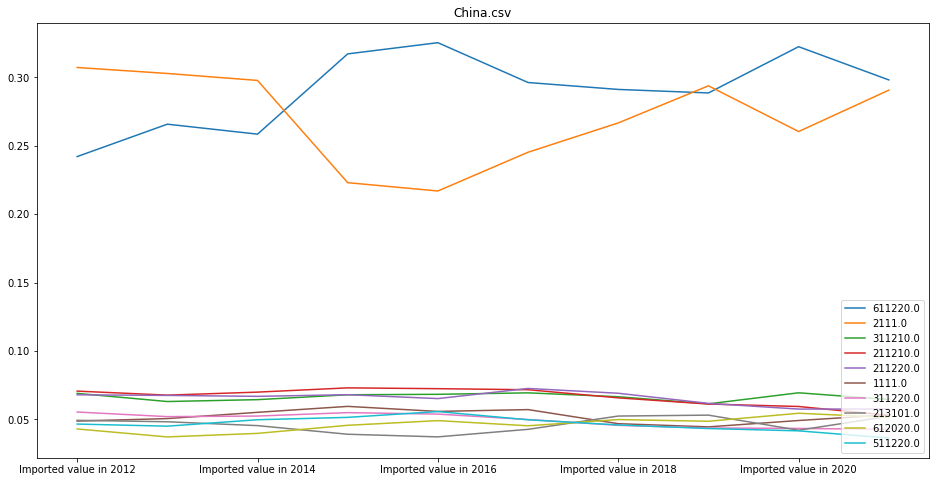

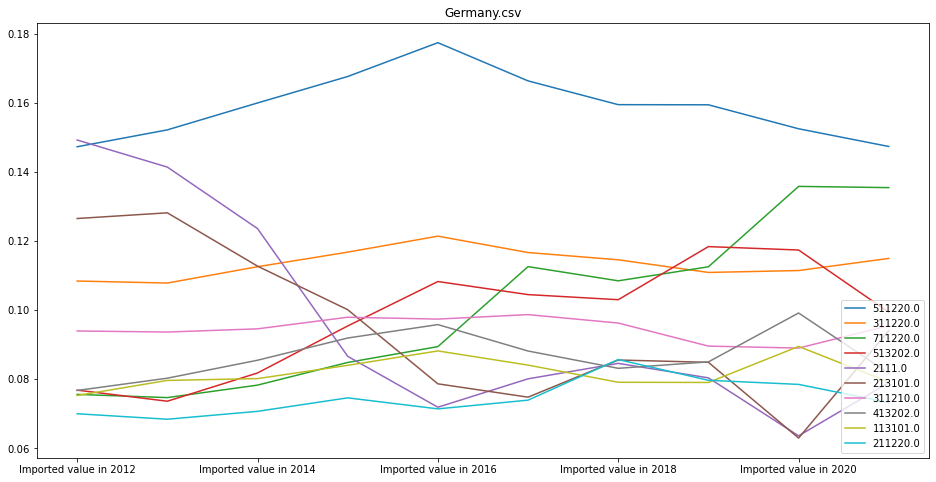

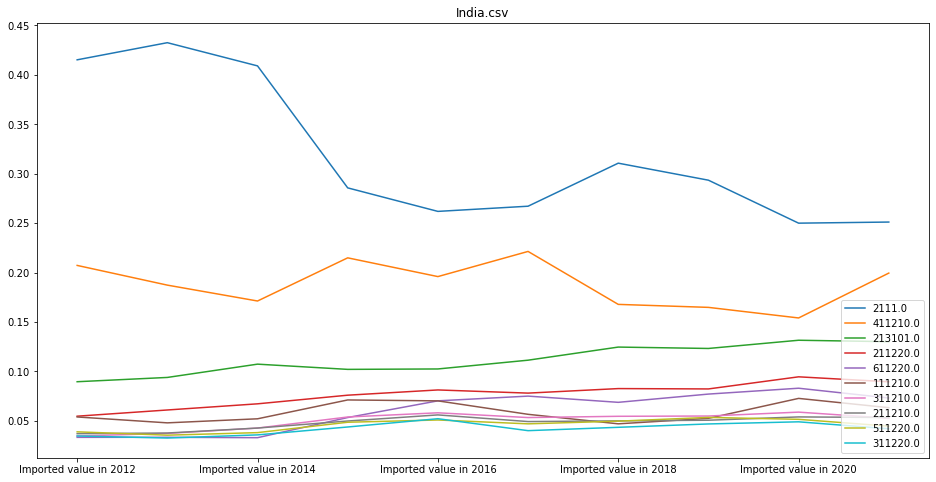

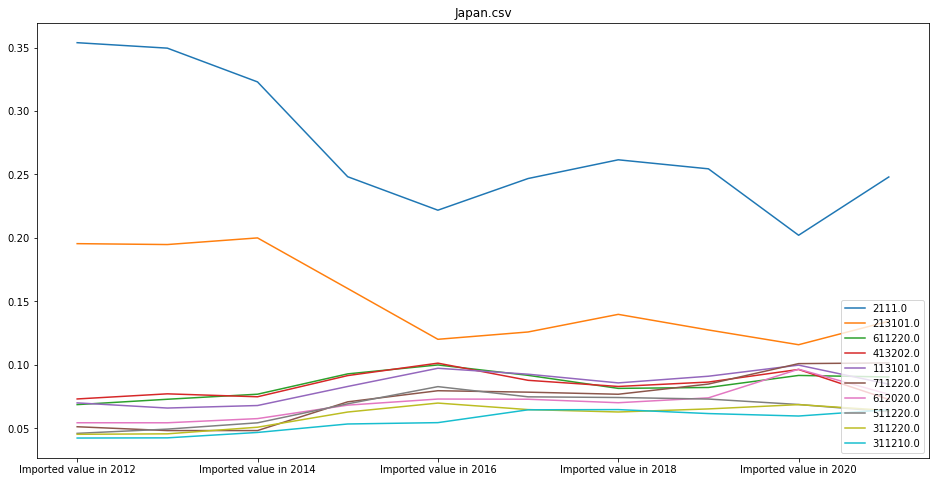

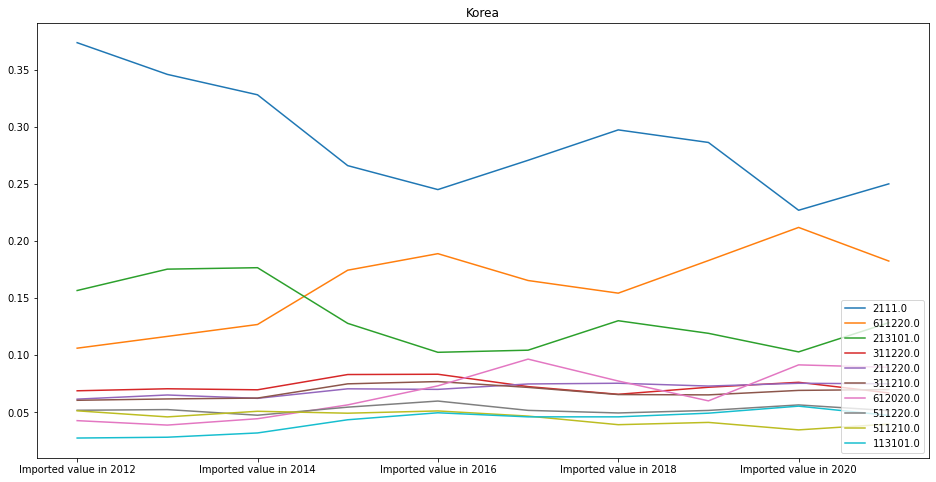

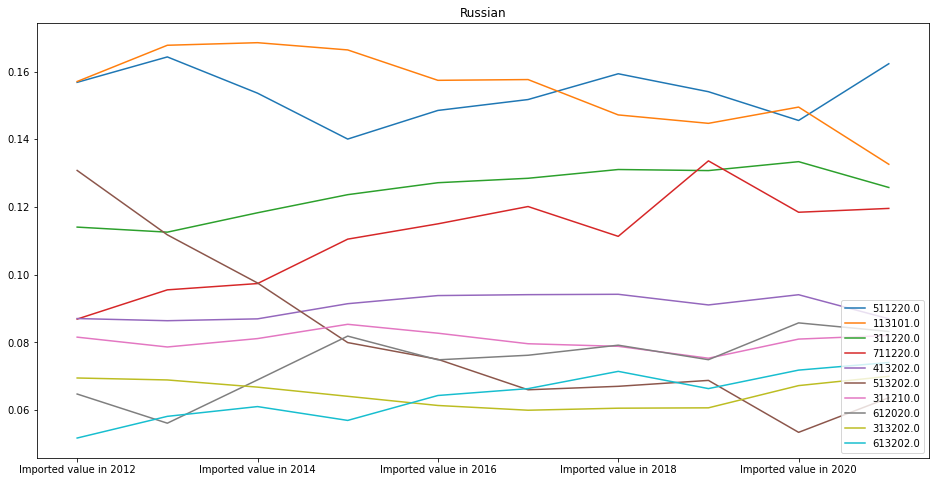

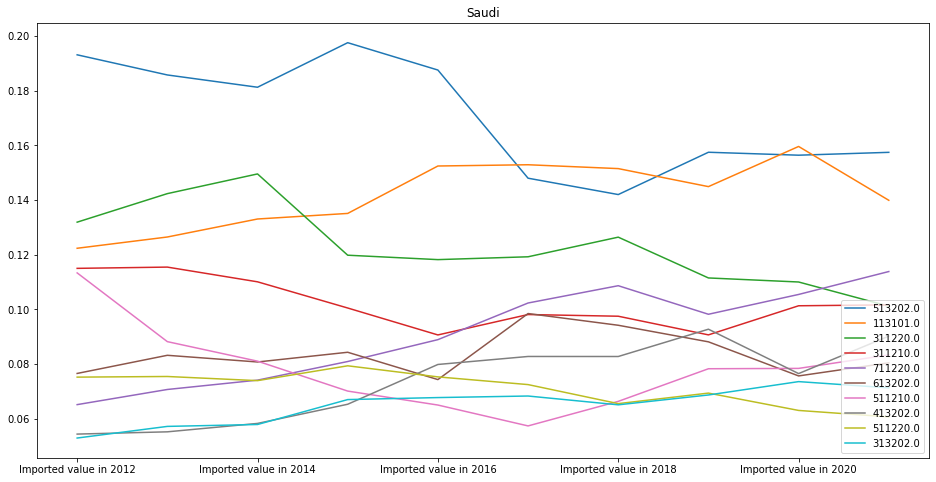

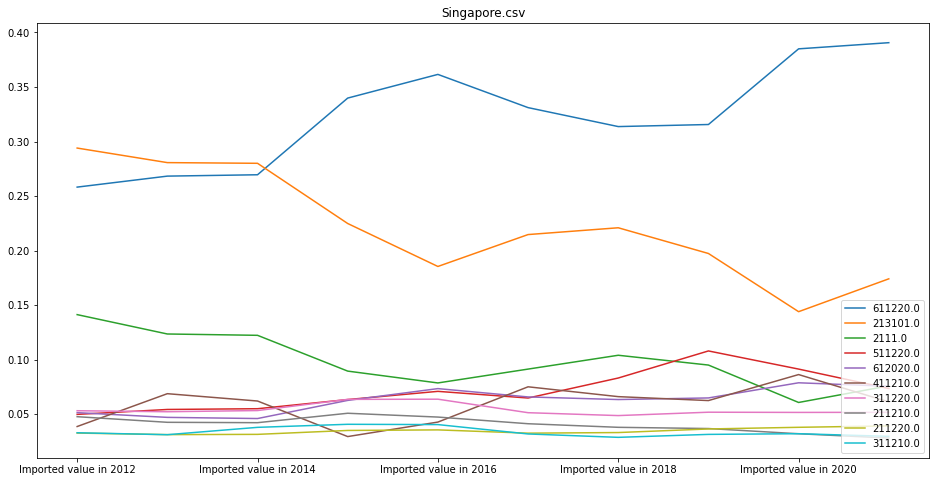

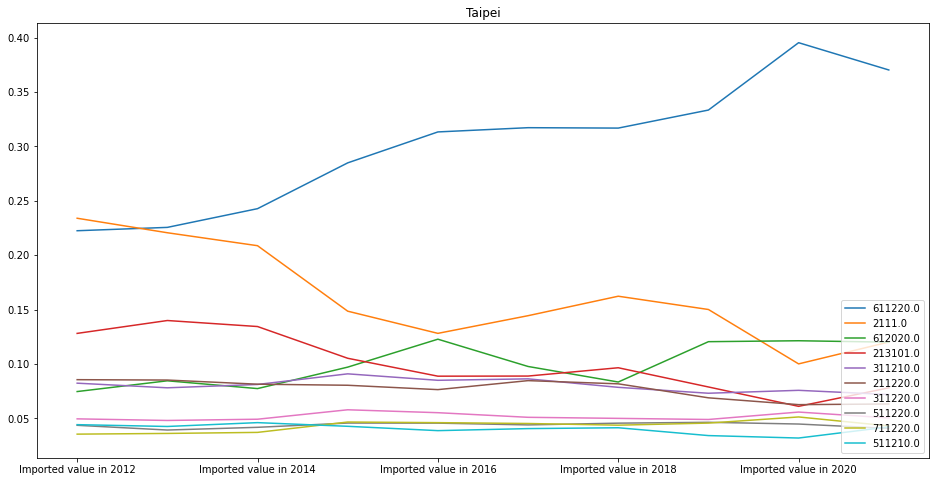

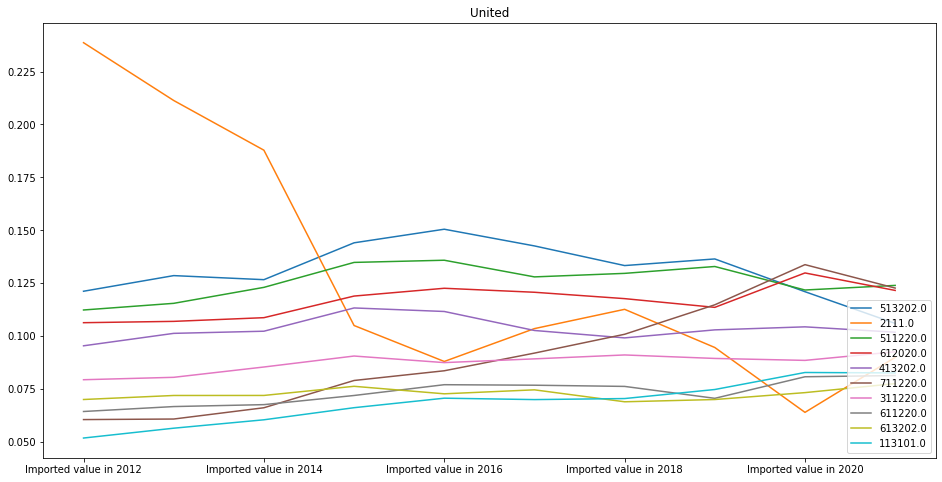

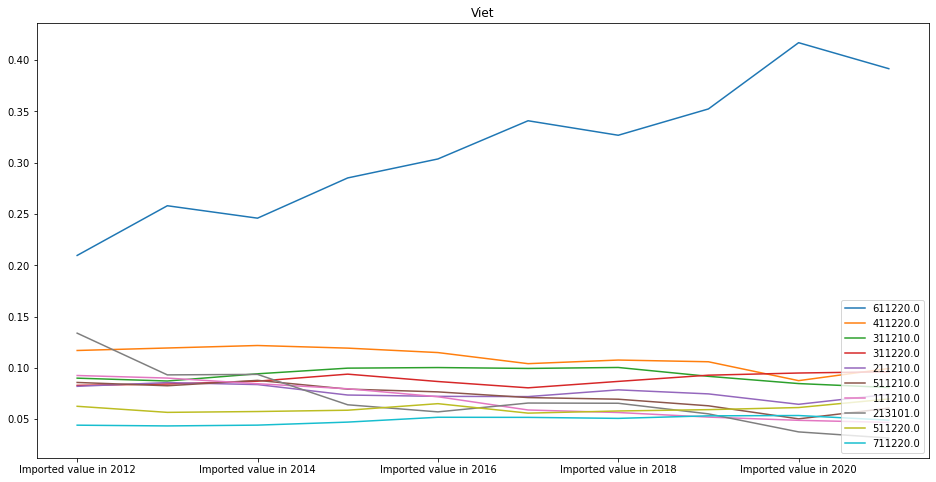

In [38]:
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='imported':
        print(current_path)
        temp = pd.read_csv(current_path, encoding='unicode_escape')
        new_df = temp.drop(0, axis=0)
        new_df['Code'] = new_df['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        new_df = pd.merge(new_df, HS_to_BEC, left_on='Code', right_on='HS6', how='inner')
        new_df = new_df.groupby('BEC5Code1').sum()
        columns_list = new_df.columns[0:10]
        summury_im = new_df[columns_list]
        index_large = summury_im.T.sum().sort_values(ascending=False).index[0:10]
        set_image = summury_im.loc[index_large]
        set_image.div(set_image.sum(axis=0), axis=1).T.plot(figsize=(16, 8))
        plt.title(current_path.split('_')[8])
        plt.legend(loc='lower right')

### 수출액으로 나라별 분류

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Vi

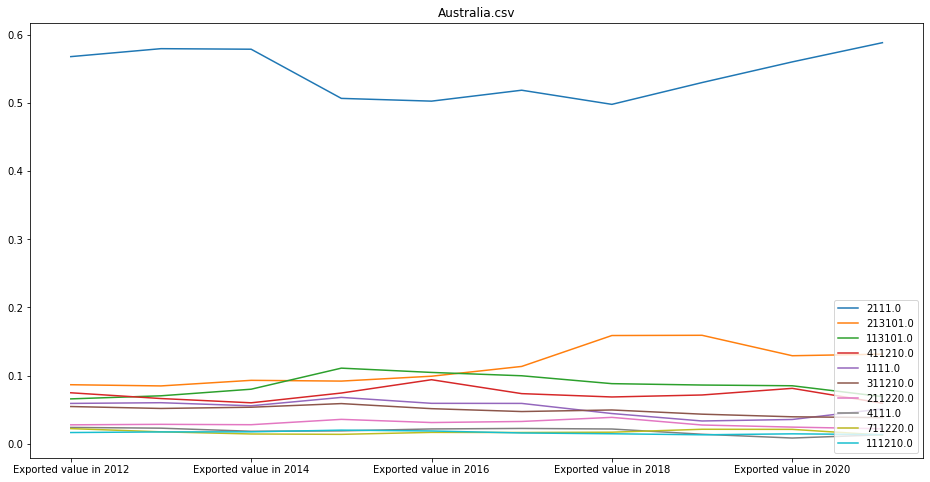

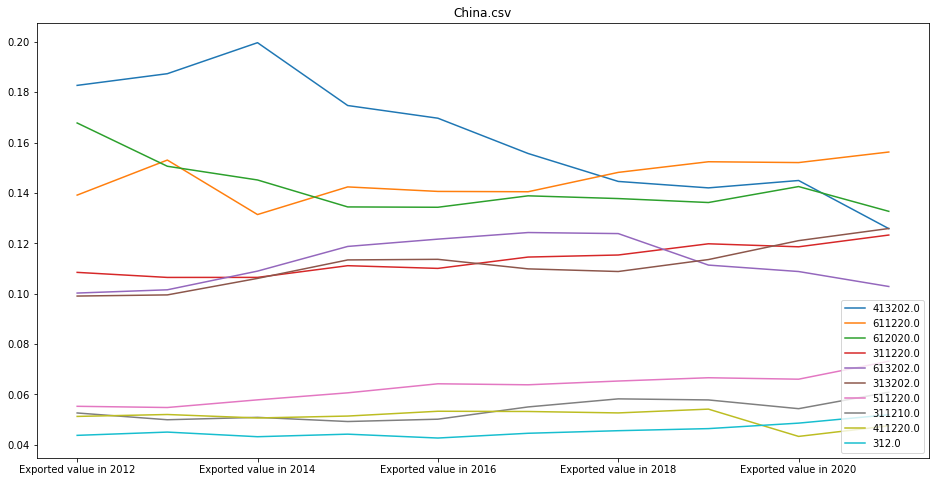

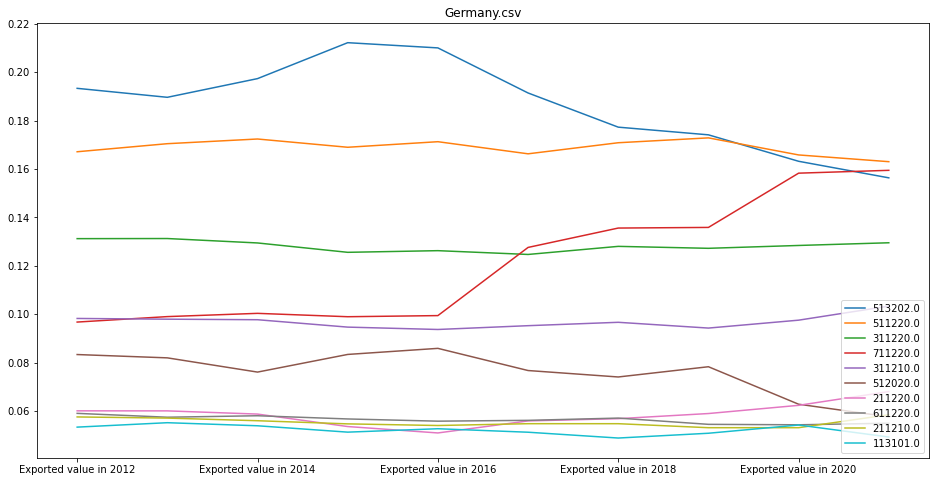

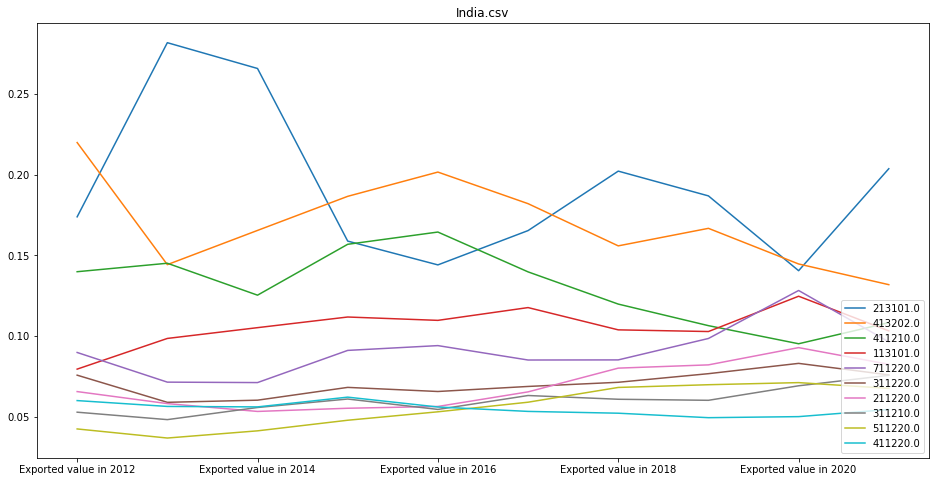

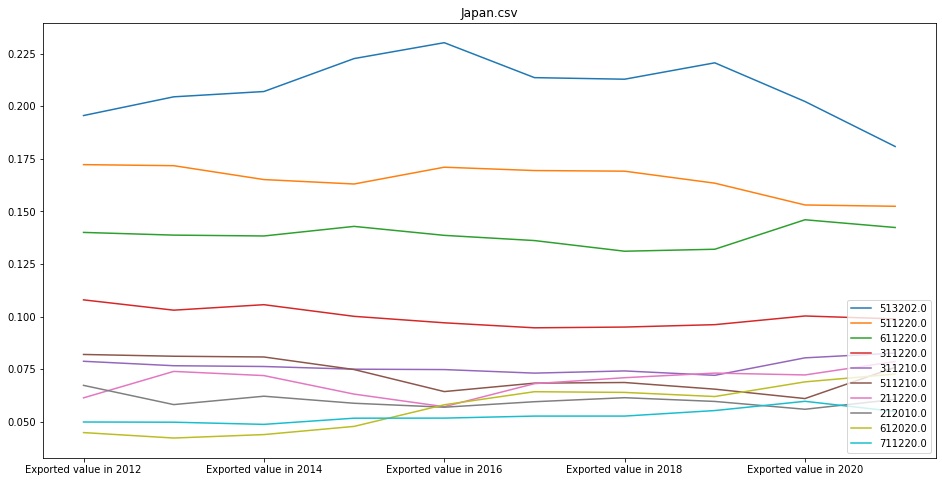

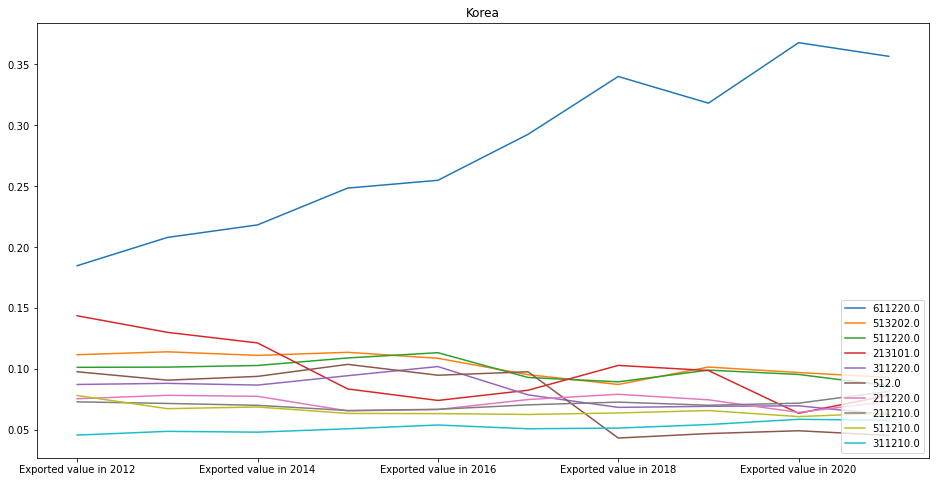

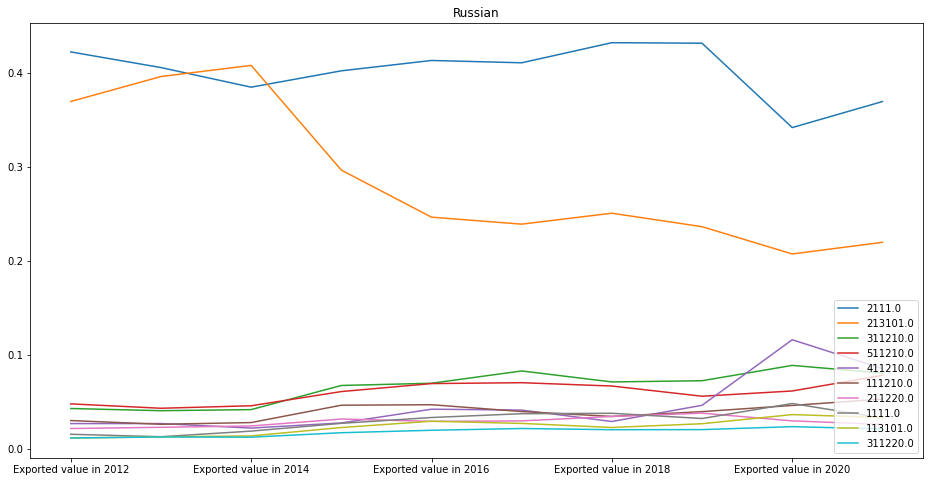

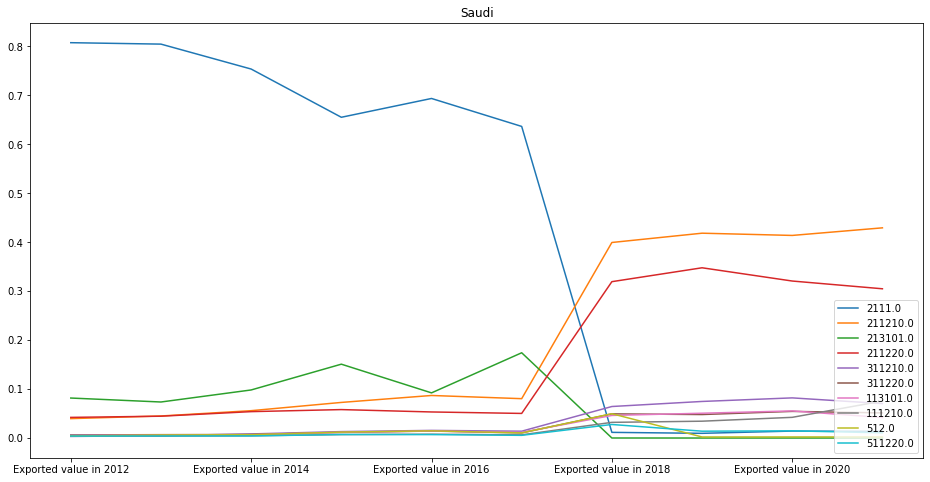

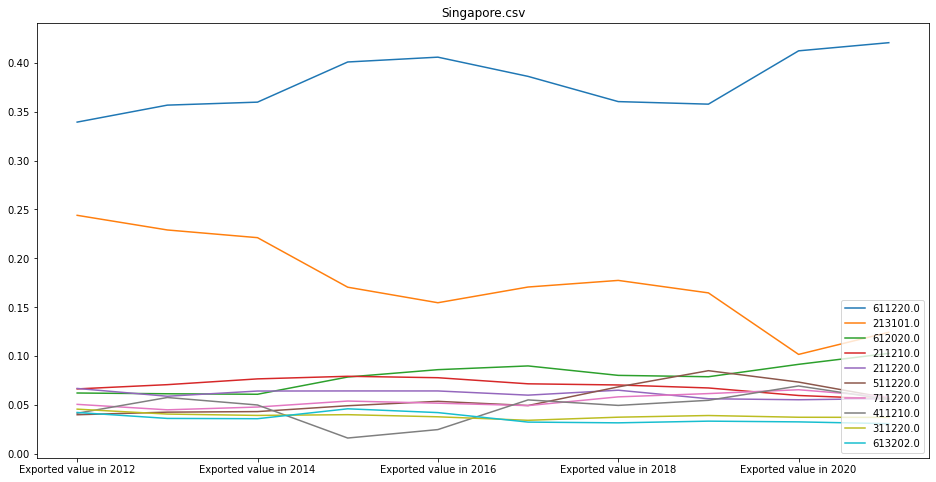

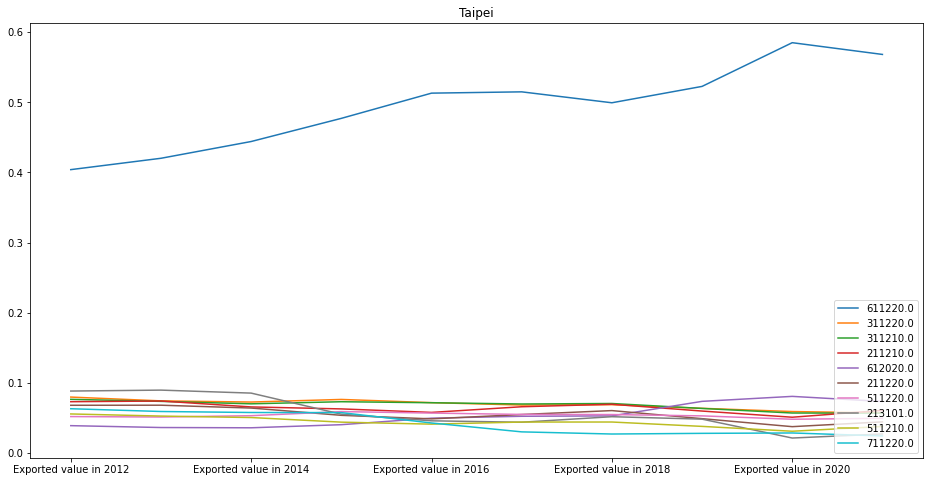

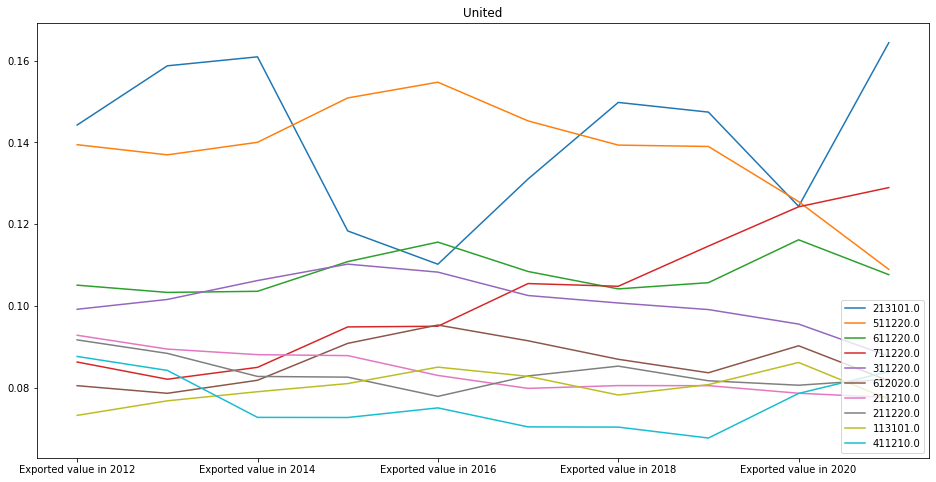

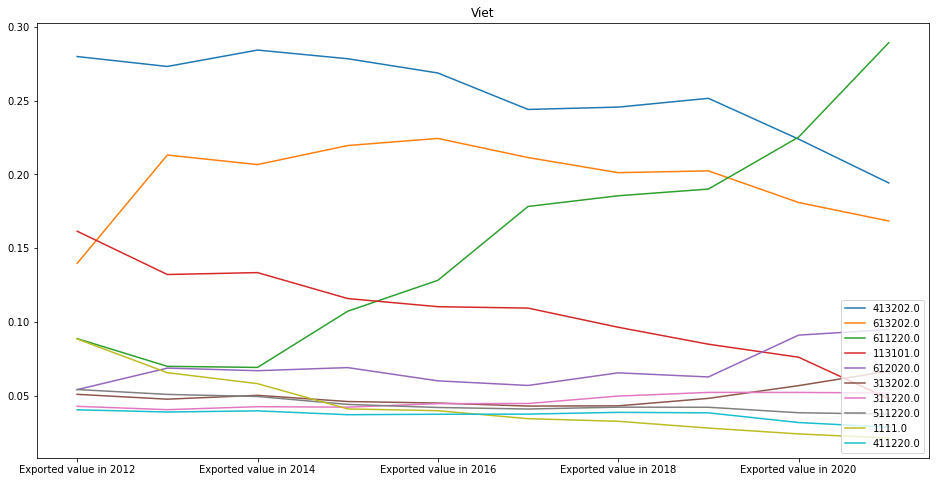

In [37]:
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    count = 0
    if current_path.split('_')[6]=='exported':
        print(current_path)
        temp = pd.read_csv(current_path, encoding='unicode_escape')
        new_df = temp.drop(0, axis=0)
        new_df['Code'] = new_df['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        new_df = pd.merge(new_df, HS_to_BEC, left_on='Code', right_on='HS6', how='inner')
        new_df = new_df.groupby('BEC5Code1').sum()
        columns_list = new_df.columns[0:10]
        summury_im = new_df[columns_list]
        index_large = summury_im.T.sum().sort_values(ascending=False).index[0:10]
        set_image = summury_im.loc[index_large]
        set_image.div(set_image.sum(axis=0), axis=1).T.plot(figsize=(16, 8))
        plt.title(current_path.split('_')[8])
        plt.legend(loc='lower right')